<a href="https://colab.research.google.com/github/DaniPorticella/proyecto_stroke_coderhouse/blob/main/ProyectoDSParteI_Porticella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract

El accidente cerebrovascular (ACV) es una de las principales causas de discapacidad y mortalidad en todo el mundo. La identificación temprana de factores de riesgo asociados permite diseñar estrategias de prevención más eficaces, con un impacto directo en la salud pública y en la calidad de vida de los pacientes.

El presente proyecto utiliza el Stroke Prediction Dataset, disponible en Kaggle, que reúne información clínica y demográfica de 5110 individuos. El conjunto de datos contiene 12 variables que incluyen características sociodemográficas (edad, género, estado civil, tipo de trabajo, tipo de residencia), factores de riesgo clínicos (hipertensión, enfermedad cardíaca, índice de masa corporal, glucemia) y habitos (tabaquismo). La variable objetivo *stroke* indica si la persona presentó o no un accidente cerebrovascular.

Este dataset ofrece la oportunidad de explorar cómo distintos factores interactúan y contribuyen al riesgo de ACV. Por ejemplo, se pueden analizar patrones en la distribución de edad y género, la relación entre hipertensión y enfermedad cardiovascular, o la asociación entre obesidad, hiperglucemia y mayor probabilidad de ACV. Asimismo, se identifican valores faltantes en la variable BMI, lo que plantea la necesidad de aplicar técnicas de limpieza o imputación de datos.

El análisis se orienta a responder preguntas clave: ¿qué variables muestran mayor correlación con la ocurrencia de ACV? ¿Existen combinaciones de factores clínicos y sociales que aumenten el riesgo? ¿Qué visualizaciones permiten comprender mejor la magnitud del problema?

En conclusión, este proyecto busca generar visualizaciones y análisis exploratorios que sirvan como punto de partida para comprender la complejidad del ACV y sentar las bases para el desarrollo futuro de modelos predictivos que ayuden en la toma de decisiones clínicas y preventivas.


In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/DaniPorticella/proyecto_stroke_coderhouse/refs/heads/main/healthcare-dataset-stroke-data.csv")

df.head()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

df.info()

df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


### Preguntas e hipótesis

1. **Edad y ACV:** ¿Las personas de mayor edad presentan una mayor frecuencia de ACV?  
   - Hipótesis: la edad avanzada se asocia a mayor riesgo de ACV.  

2. **Hipertensión y enfermedad cardiovascular:** ¿La coexistencia de hipertensión y enfermedad cardiovascular incrementa el riesgo de ACV?  
   - Hipótesis: la presencia de ambos factores aumenta significativamente la probabilidad de ACV.  

3. **Índice de masa corporal (BMI):** ¿Un BMI elevado (obesidad) se relaciona con mayor frecuencia de ACV?  
   - Hipótesis: la obesidad está asociada a un riesgo más alto de ACV.  

4. **Glucemia promedio:** ¿Niveles elevados de glucosa se asocian con mayor incidencia de ACV?  
   - Hipótesis: la hiperglucemia constituye un factor de riesgo relevante para ACV.  


### Pregunta 1: Edad y ACV  
¿Las personas de mayor edad presentan una mayor frecuencia de ACV?  

**Hipótesis:** la edad avanzada se asocia a mayor riesgo de ACV.


In [ ]:
# Resumen estadístico de la edad por grupo de ACV
df.groupby("stroke")["age"].describe()


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,41.971545,22.291940,0.08,24.0,43.0,59.0,82.0
1,249.0,67.728193,12.727419,1.32,59.0,71.0,78.0,82.0


Descripción del resumen estadístico:  
- En el grupo sin ACV (`stroke=0`), la edad promedio es de ~42 años, con una mediana de 43.  
- En el grupo con ACV (`stroke=1`), la edad promedio asciende a ~67 años, con una mediana de 71.  
- El rango intercuartílico también se desplaza: en pacientes con ACV, el 50% central se concentra entre 59 y 78 años, mientras que en los que no tuvieron ACV va de 24 a 59 años.  

Esto muestra que las personas con ACV son, en promedio, bastante mayores que aquellas sin ACV.


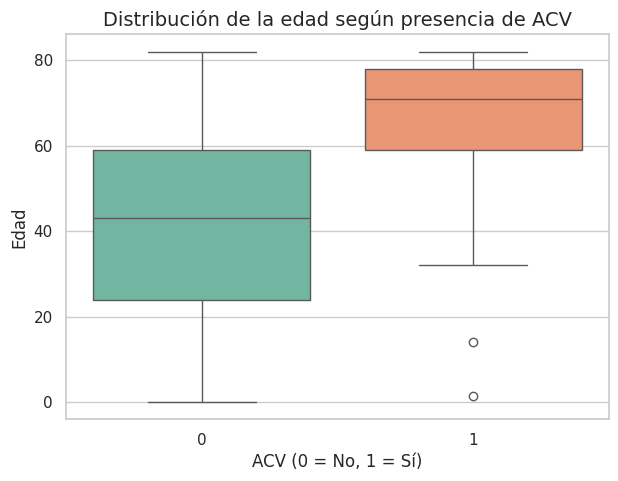

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(7,5))
sns.boxplot(x="stroke", y="age", data=df, hue="stroke", palette="Set2", legend=False)
plt.title("Distribución de la edad según presencia de ACV", fontsize=14)
plt.xlabel("ACV (0 = No, 1 = Sí)")
plt.ylabel("Edad")
plt.show()


**Conclusión**:

El análisis estadístico muestra que las personas con ACV (stroke=1) presentan una mediana y promedio de edad más elevados que las personas sin ACV (stroke=0).

Además, el rango de edades en el grupo con ACV se concentra en valores más altos. Estos resultados apoyan la hipótesis de que la edad avanzada se asocia a un mayor riesgo de accidente cerebrovascular.


### Pregunta 2: Hipertensión y enfermedad cardiovascular  

¿La coexistencia de hipertensión y enfermedad cardiovascular incrementa el riesgo de ACV?  

**Hipótesis:** la presencia de ambos factores aumenta significativamente la probabilidad de ACV.


In [ ]:
# Creo variable combinada hipertension y enfermedad cardiovascular

df["hipertension_cardio"] = ((df["hypertension"] == 1) & (df["heart_disease"] == 1)).astype(int)

# Ver cuántos pacientes cumplen ambas condiciones
df["hipertension_cardio"].value_counts()

# 0 = no tiene ambas condiciones a la vez
# 1 = tiene hipertension y enfermedad cardiovascular

,count
hipertension_cardio,
0,5046
1,64


In [ ]:
# ver cual es la proporcion de stroke (ACV) en cada grupo

df.groupby("hipertension_cardio")["stroke"].mean()


,stroke
hipertension_cardio,
0,0.046770
1,0.203125


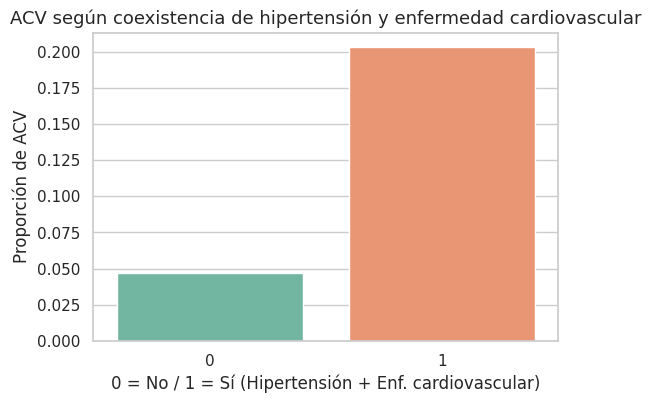

In [ ]:
#crear grafico de barras para ver la proporcion de stroke

plt.figure(figsize=(6,4))
sns.barplot(x="hipertension_cardio", y="stroke", data=df,
            hue="hipertension_cardio", palette="Set2", legend=False, errorbar=None)
plt.title("ACV según coexistencia de hipertensión y enfermedad cardiovascular", fontsize=13)
plt.xlabel("0 = No / 1 = Sí (Hipertensión + Enf. cardiovascular)")
plt.ylabel("Proporción de ACV")
plt.show()


**Conclusión**:

Los resultados muestran que los pacientes con coexistencia de hipertensión y enfermedad cardiovascular presentan una proporción de ACV significativamente mayor (20%) en comparación con aquellos sin ambas condiciones (4%).

Esto respalda la hipótesis de que la combinación de estos factores de riesgo potencia la probabilidad de accidente cerebrovascular.

### Pregunta 3: BMI y ACV  
¿Un BMI elevado (obesidad) se relaciona con mayor frecuencia de ACV?  

**Hipótesis:** la obesidad está asociada a un riesgo más alto de ACV.


In [ ]:
# Resumen estadístico del BMI por grupo de ACV
df.groupby("stroke")["bmi"].describe()


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4700.0,28.823064,7.908287,10.3,23.4,28.0,33.1,97.6
1,209.0,30.471292,6.329452,16.9,26.4,29.7,33.7,56.6


Descripción del resumen estadístico:
- En el grupo sin ACV (`stroke=0`), el BMI promedio es de ~28.8 y la mediana es 28.0, con un rango intercuartílico entre 23.4 y 33.1. Existen valores extremos muy altos, con un máximo de 97.6.  
- En el grupo con ACV (`stroke=1`), el BMI promedio es ligeramente mayor (~30.5) y la mediana es 29.7, con un rango intercuartílico entre 26.4 y 33.7. El máximo es 56.6, menor que el de los pacientes sin ACV.  

En conjunto, estos datos muestran que las distribuciones de BMI en ambos grupos son bastante similares, con solo una leve tendencia hacia valores mayores en quienes tuvieron ACV; no parece haber una diferencia significativa en el índice de masa corporal entre pacientes con y sin ACV en este dataset.

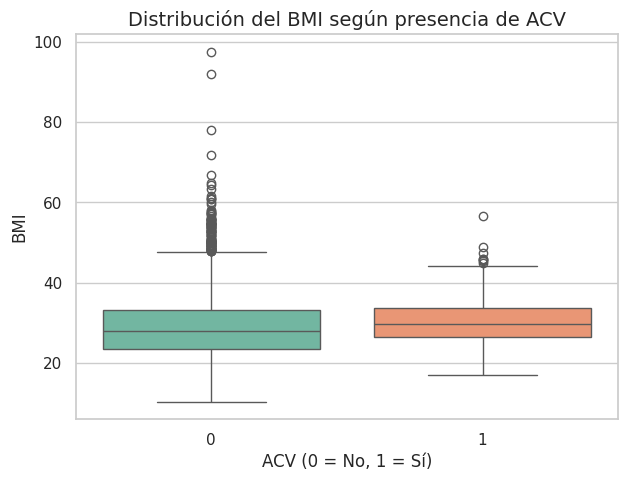

In [ ]:
# Crear boxplot para comparar la distribución del BMI entre pacientes con y sin ACV

plt.figure(figsize=(7,5))
sns.boxplot(x="stroke", y="bmi", data=df, hue="stroke", palette="Set2", legend=False)
plt.title("Distribución del BMI según presencia de ACV", fontsize=14)
plt.xlabel("ACV (0 = No, 1 = Sí)")
plt.ylabel("BMI")
plt.show()


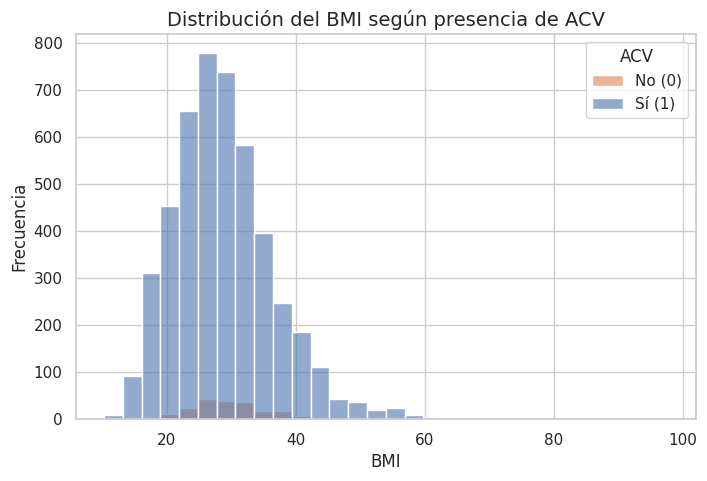

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tomo solo columnas necesarias y quito nulos de BMI
dff = df[['bmi', 'stroke']].dropna()

plt.figure(figsize=(8,5))
sns.histplot(
    data=dff,
    x='bmi',
    hue='stroke',          # 0 = No ACV, 1 = Sí ACV
    hue_order=[0, 1],      # aseguro el orden
    bins=30,
    multiple='layer',      # barras superpuestas
    stat='count',          # cuentas absolutas (no densidad)
    alpha=0.6
)
plt.title("Distribución del BMI según presencia de ACV", fontsize=14)
plt.xlabel("BMI")
plt.ylabel("Frecuencia")
plt.legend(title="ACV", labels=["No (0)", "Sí (1)"], loc="upper right")
plt.show()

# Las barras de “No ACV (0)” son claramente más altas porque hay muchos más pacientes sin ACV en el dataset,
#pero la forma de ambas distribuciones es muy parecida (pico entre ~25–32 y una cola hacia valores altos de BMI),
#lo que sugiere que el índice de masa corporal no muestra diferencias relevantes entre ambos grupos.


**Conclusión**:

El análisis de BMI según presencia de ACV muestra que la mediana y el rango intercuartílico son similares en ambos grupos, lo que sugiere que en esta muestra el índice de masa corporal no parece ser un factor fuertemente diferenciador en la ocurrencia de ACV.

Se observan algunos valores atípicos de BMI elevados, principalmente en el grupo sin ACV.

###Pregunta 4: Glucemia y ACV

¿Niveles elevados de glucemia se asocian con mayor incidencia de ACV?

Hipótesis: la hiperglucemia constituye un factor de riesgo relevante para ACV.

In [ ]:
# Resumen estadístico de la glucemia por grupo de ACV
df.groupby("stroke")["avg_glucose_level"].describe()


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,104.795513,43.846069,55.12,77.12,91.47,112.83,267.76
1,249.0,132.544739,61.921056,56.11,79.79,105.22,196.71,271.74


Descripción del resumen estadístico:
- En el grupo sin ACV (`stroke=0`), la glucemia promedio es de **~105 mg/dL**, con una mediana de **91 mg/dL** y un rango intercuartílico entre 77 y 113.  
- En el grupo con ACV (`stroke=1`), la glucemia promedio asciende a **~133 mg/dL**, con una mediana de **105 mg/dL** y un rango intercuartílico mucho más alto, entre 80 y 197.  
- Los valores máximos son similares (267.7 en no ACV vs. 271.7 en ACV), pero la dispersión en el grupo con ACV es bastante mayor (desvío estándar 61.9 vs. 43.8).  


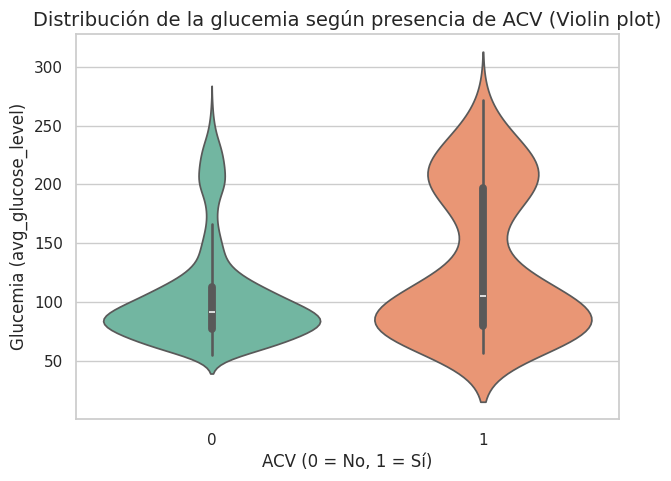

In [ ]:
# Violin plot de glucemia según ACV
plt.figure(figsize=(7,5))
sns.violinplot(
    x="stroke",
    y="avg_glucose_level",
    data=df,
    hue="stroke",
    palette="Set2",
    legend=False
)
plt.title("Distribución de la glucemia según presencia de ACV (Violin plot)", fontsize=14)
plt.xlabel("ACV (0 = No, 1 = Sí)")
plt.ylabel("Glucemia (avg_glucose_level)")
plt.show()


Analisis del violin plot:
El gráfico muestra que los pacientes con ACV tienden a tener valores de glucemia más altos y distribuciones más dispersas que los pacientes sin ACV. Se observa que la mediana está desplazada hacia arriba en el grupo con ACV, reforzando la asociación entre hiperglucemia y mayor riesgo de accidente cerebrovascular.

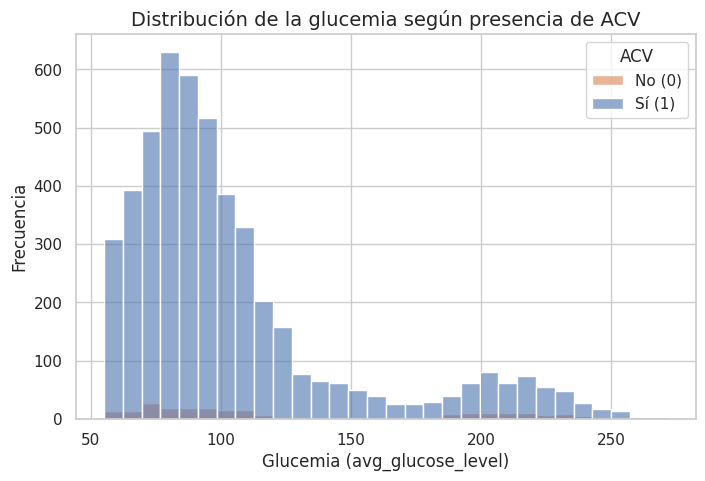

In [ ]:
# Crear histograma de glucemia separado por presencia de ACV
dff = df[['avg_glucose_level', 'stroke']].dropna()

plt.figure(figsize=(8,5))
sns.histplot(
    data=dff,
    x="avg_glucose_level",
    hue="stroke",          # 0 = No ACV, 1 = Sí ACV
    hue_order=[0,1],
    bins=30,
    multiple="layer",      # barras superpuestas
    stat="count",          # cuentas absolutas
    alpha=0.6
)
plt.title("Distribución de la glucemia según presencia de ACV", fontsize=14)
plt.xlabel("Glucemia (avg_glucose_level)")
plt.ylabel("Frecuencia")
plt.legend(title="ACV", labels=["No (0)", "Sí (1)"], loc="upper right")
plt.show()


Analisis del histograma:  
La frecuencia representa la cantidad de pacientes en cada rango de glucemia. Se observa que la mayoría de los pacientes sin ACV se concentran entre 70 y 120 mg/dL, mientras que en el grupo con ACV hay mayor proporción de casos en valores más altos de glucemia (superiores a 150 mg/dL).

**Conclusión:**  
Los pacientes con ACV presentan niveles de glucemia más altos que aquellos sin ACV. La mediana y el rango intercuartílico están desplazados hacia valores mayores en el grupo con ACV, y además se observa una mayor dispersión.

Estos hallazgos apoyan la hipótesis de que la hiperglucemia constituye un factor de riesgo relevante para el accidente cerebrovascular.
